# Reproducibility Package for Reachability Analysis of FMI Models Using Data-Driven Dynamic Sensitivity

In [1]:
%matplotlib inline

import sage.all as sg
from varsys import System
import pandas as pd
from benchmarking import *
import pickle
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
from sage.all import RIF
from time import perf_counter
from lbuc import IntegrationMethod
import math

## Validation Experiments: Linear Systems

### 2D Linear Systems Dataset

Load a pregenerated dataset of 100 randomly generated linear systems

In [2]:
with open("results/lin_sys.pkl", "rb") as f:
    lin_sys = pickle.load(f)

Code to generate an entirely new dataset of linear systems. **Uncomment line below to run benchmarks on this new random dataset, rather than the one used in the paper.**

In [3]:
# lin_sys = generate_linear_systems(2, 50)

In [4]:
lin_sys

{True: [System(R, (x1, x2), [[0.77573056606043810 .. 0.79354687007066239], [0.26127496792955229 .. 0.79105226348380132]], (-0.8498901399115169*x1 - 0.8819652023681293*x2 - 0.8794235921166287, 0.4257985219444005*x1 - 0.030571984024618803*x2 - 0.7079492254317936), varmap=bidict({'x1': x1, 'x2': x2}))),
  System(R, (x1, x2), [[-0.73498634994593904 .. -0.47366275677423641], [0.30070130560274943 .. 0.32674849179812577]], (-0.1683881963378855*x1 + 0.5196794548074175*x2 + 0.021979499320604168, -0.6588166748958404*x1 - 0.5660013038365435*x2 + 0.14942197657395684), varmap=bidict({'x1': x1, 'x2': x2}))),
  System(R, (x1, x2), [[0.73819772957965201 .. 0.96695269743100277], [0.44130983073891560 .. 0.91840571901448032]], (-0.9549543670156542*x1 + 0.13314767348183132*x2 - 0.2957797505912847, -0.45668365367400865*x1 - 0.2524231873618108*x2 - 0.11817720055468017), varmap=bidict({'x1': x1, 'x2': x2}))),
  System(R, (x1, x2), [[0.34979357798894428 .. 0.36407299537496574], [0.76471649147798803 .. 0.77245

Organise the linear systems into a dataframe (class is $True$ if stable and $False$ if unstable)

In [5]:
df = pd.DataFrame(lin_sys).melt()
df.columns = ['Class', 'System']
df[0:5]

,Class,System
0,True,"System(R, (x1, x2), [[0.77573056606043810 .. 0..."
1,True,"System(R, (x1, x2), [[-0.73498634994593904 .. ..."
2,True,"System(R, (x1, x2), [[0.73819772957965201 .. 0..."
3,True,"System(R, (x1, x2), [[0.34979357798894428 .. 0..."
4,True,"System(R, (x1, x2), [[0.81350321903339994 .. 0..."


Create list of all systems

In [6]:
all_sys = sum(lin_sys.values(), [])

### Figure 6

Comparison of reachability from sampled Lipschitz constants with Flow* and Sensitivity Analysis results for a randomly
generated 2D stable system (left), an unstable system (middle), and an oscillator (right) from the unit initial region $[−1, 1]^2$.
Numerical simulations (grey) for 100 randomly sampled initial conditions are shown for comparison.

In [7]:
R, x = sg.PolynomialRing(sg.RR, 2, [f"x{i}" for i in range(2)]).objgens()

In [8]:
from lbuc import fintervals

In [9]:
def comparison_plots(S):
    '''Generate plot comparing three methods'''
    n_samples = 40
    sol_set = S.solve_sampled(n_samples, (0, 5))
    solf = S.solve_flowstar((0, 5))
    sols = S.solve_sensitive(1, (0, 5))
    soll = S.solve_lipschitz_sampled_fixed(n_samples, (0, 5))

    return [
        (  sol_set.plot(xs=v, color='#5A5A5A')
         + solf.plot(xs=v, color='red', fill=None, linestyle='solid', thickness=2.0,
                     legend_label=('Flow*', None))
         + soll.plot(xs=v, color='blue', linestyle='dashdot', fill=None, adaptive_recursion=0, thickness=2.0,
                     plot_points=20, legend_label=('Sampled', None))
         + sols.plot(xs=v, color='green', linestyle='dashed', fill=None,
                     legend_label=('Sensitive', None), thickness=2.0,
                     axes_labels=["$t$", f"${v}$"]))
        for v in x
    ]

Array of subfigures

In [10]:
subfigs = [[None,None],[None,None],[None,None]]

#### Column 1: Stable Node

In [11]:
S = lin_sys[True][0].with_y0([sg.RIF(-1,1), sg.RIF(-1,1)])

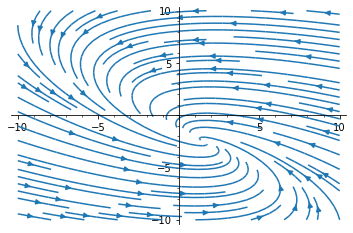

In [12]:
S.streamline_plot((S.x[0], -10, 10), (S.x[1], -10, 10)).matplotlib()

In [13]:
comp_stable = comparison_plots(S)

flowstar odes:
dx1/dt = -0.8498901399115169*x1 - 0.8819652023681293*x2 - 0.8794235921166287
dx2/dt = 0.4257985219444005*x1 - 0.030571984024618803*x2 - 0.7079492254317936
time = 0.010000,	step = 0.010000,	order = 6
time = 0.020000,	step = 0.010000,	order = 6
time = 0.030000,	step = 0.010000,	order = 6
time = 0.040000,	step = 0.010000,	order = 6
time = 0.050000,	step = 0.010000,	order = 6
time = 0.060000,	step = 0.010000,	order = 6
time = 0.070000,	step = 0.010000,	order = 6
time = 0.080000,	step = 0.010000,	order = 6
time = 0.090000,	step = 0.010000,	order = 6
time = 0.100000,	step = 0.010000,	order = 6
time = 0.110000,	step = 0.010000,	order = 6
time = 0.120000,	step = 0.010000,	order = 6
time = 0.130000,	step = 0.010000,	order = 6
time = 0.140000,	step = 0.010000,	order = 6
time = 0.150000,	step = 0.010000,	order = 6
time = 0.160000,	step = 0.010000,	order = 6
time = 0.170000,	step = 0.010000,	order = 6
time = 0.180000,	step = 0.010000,	order = 6
time = 0.190000,	step = 0.010000,	orde

In [14]:
subfigs[0] = comp_stable
subfigs[0][0].set_legend_options(bbox_to_anchor=(1.2, 1.2, 1.1, 1), loc=3,ncol=10, fancybox=True, shadow=True, font_size=16)

In [15]:
subfigs[0][1].legend(False)

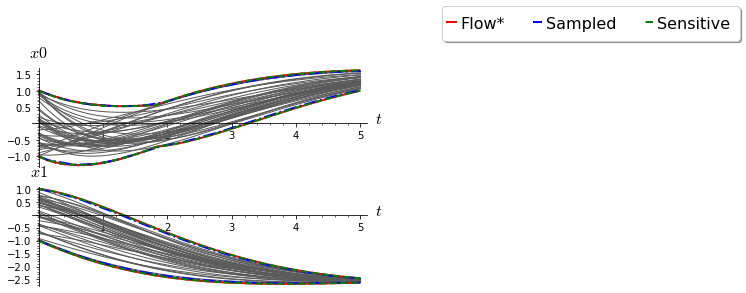

In [16]:
sg.graphics_array(subfigs[0], 2, 1).matplotlib()

#### Column 2: Unstable node

In [17]:
S = lin_sys[False][0].with_y0([sg.RIF(-1,1), sg.RIF(-1,1)])

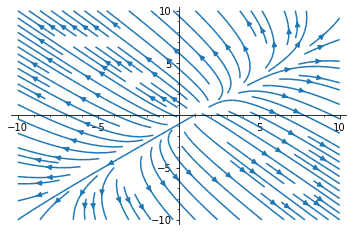

In [18]:
S.streamline_plot((S.x[0], -10, 10), (S.x[1], -10, 10)).matplotlib()

In [19]:
subfigs[1] = comp_unstable = comparison_plots(S)

flowstar odes:
dx1/dt = 0.4888081074853379*x1 - 0.3643192221328071*x2 - 0.49304268315516486
dx2/dt = -0.3508533865446364*x1 + 0.5629453443669854*x2 + 0.3216395665339422
time = 0.010000,	step = 0.010000,	order = 6
time = 0.020000,	step = 0.010000,	order = 6
time = 0.030000,	step = 0.010000,	order = 6
time = 0.040000,	step = 0.010000,	order = 6
time = 0.050000,	step = 0.010000,	order = 6
time = 0.060000,	step = 0.010000,	order = 6
time = 0.070000,	step = 0.010000,	order = 6
time = 0.080000,	step = 0.010000,	order = 6
time = 0.090000,	step = 0.010000,	order = 6
time = 0.100000,	step = 0.010000,	order = 6
time = 0.110000,	step = 0.010000,	order = 6
time = 0.120000,	step = 0.010000,	order = 6
time = 0.130000,	step = 0.010000,	order = 6
time = 0.140000,	step = 0.010000,	order = 6
time = 0.150000,	step = 0.010000,	order = 6
time = 0.160000,	step = 0.010000,	order = 6
time = 0.170000,	step = 0.010000,	order = 6
time = 0.180000,	step = 0.010000,	order = 6
time = 0.190000,	step = 0.010000,	order

In [20]:
for p in subfigs[1]:
    p.legend(False)

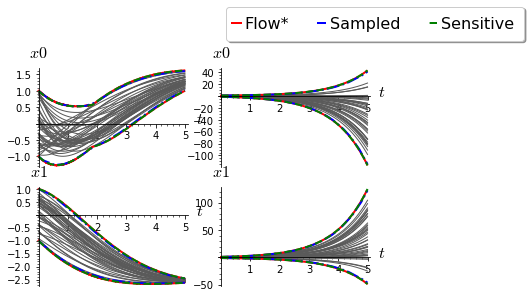

In [21]:
sg.graphics_array(list(zip(*subfigs[0:2]))).matplotlib()

#### Column 3: Oscillator

In [22]:
S = System(
    R,
    x,
    # y0=random_RIF_vector(2),
    (sg.RIF(-1, 1), sg.RIF(-1, 1)),
    y=(-sg.random()*x[1] + sg.random(), sg.random()*x[0] + sg.random()),
)

In [23]:
subfigs[2] = comp_oscillator = comparison_plots(S)

flowstar odes:
dx0/dt = -0.244088825912715*x1 + 0.807310298680105
dx1/dt = 0.814026358943068*x0 + 0.843739832979307


time = 0.010000,	step = 0.010000,	order = 6
time = 0.020000,	step = 0.010000,	order = 6
time = 0.030000,	step = 0.010000,	order = 6
time = 0.040000,	step = 0.010000,	order = 6
time = 0.050000,	step = 0.010000,	order = 6
time = 0.060000,	step = 0.010000,	order = 6
time = 0.070000,	step = 0.010000,	order = 6
time = 0.080000,	step = 0.010000,	order = 6
time = 0.090000,	step = 0.010000,	order = 6
time = 0.100000,	step = 0.010000,	order = 6
time = 0.110000,	step = 0.010000,	order = 6
time = 0.120000,	step = 0.010000,	order = 6
time = 0.130000,	step = 0.010000,	order = 6
time = 0.140000,	step = 0.010000,	order = 6
time = 0.150000,	step = 0.010000,	order = 6
time = 0.160000,	step = 0.010000,	order = 6
time = 0.170000,	step = 0.010000,	order = 6
time = 0.180000,	step = 0.010000,	order = 6
time = 0.190000,	step = 0.010000,	order = 6
time = 0.200000,	step = 0.010000,	order = 6
time = 0.210000,	step = 0.010000,	order = 6
time = 0.220000,	step = 0.010000,	order = 6
time = 0.230000,	step = 0.010000

In [24]:
for p in subfigs[2]:
    p.legend(False)

#### Final Figure 6

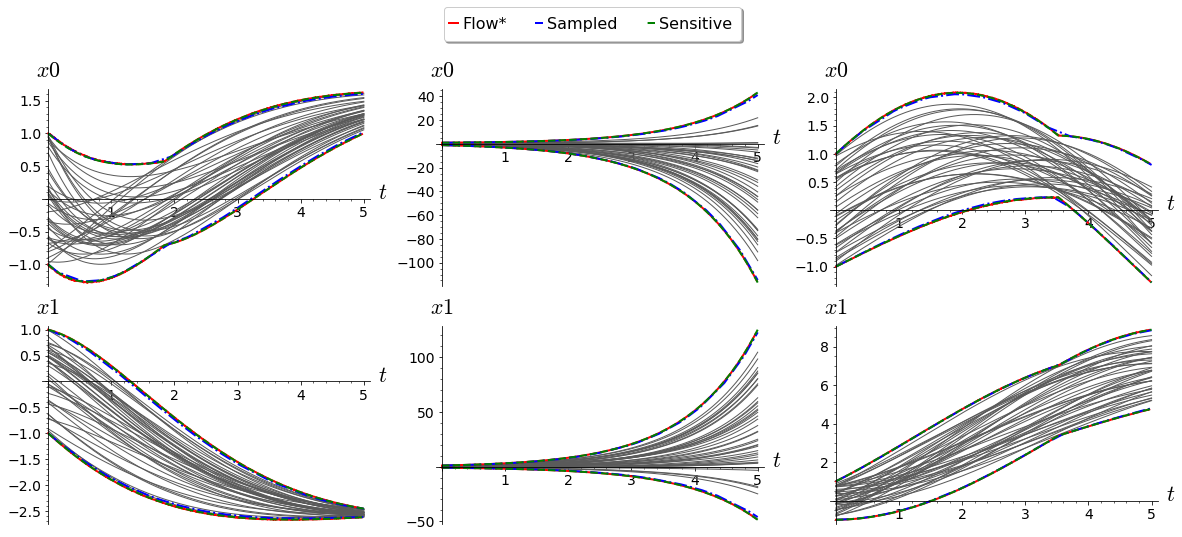

In [25]:
p = sg.graphics_array(list(zip(*subfigs)))
#p.save("figures/linear-dynamics-comparison.pdf", figsize=(20,4), fontsize=20)
p.matplotlib(figsize=(20, 8), fontsize=14).savefig("figures/linear-dynamics-comparison.pdf", bbox_inches='tight')
p.matplotlib(figsize=(20, 8), fontsize=14)
#

### Run 2D Linear Systems Benchmarks (Skippable)



Run evaluation experiments on 2D linear systems and compute statistics. **Skip running this section in order to reuse the saved results from the paper.**

Compute Lipschitz vectors for linear systems

In [31]:
ts = sg.srange(0.0, 5.0, 0.5, include_endpoint=True)
ts

def linear_system_lipschitz_vector(M, t):
    if len(M.x) == 1: 
        E = (sg.jacobian(M.y, M.x)*t).exp()
    else:
        # Use numpy for fast approximate matrix exponentiation
        E = sg.Matrix(expm((sg.jacobian(M.y, M.x)*t).numpy()))

    return sg.vector([
        y.norm(1)
            for y in E.rows()
    ])

lips = {
    sys: {t: linear_system_lipschitz_vector(sys, t)
          for t in ts}
        for sys in all_sys
}
lips

{System(R, (x1, x2), [[0.77573056606043810 .. 0.79354687007066239], [0.26127496792955229 .. 0.79105226348380132]], (-0.8498901399115169*x1 - 0.8819652023681293*x2 - 0.8794235921166287, 0.4257985219444005*x1 - 0.030571984024618803*x2 - 0.7079492254317936), varmap=bidict({'x1': x1, 'x2': x2}))): {0.0: (1.0, 1.0),
  0.5: (0.9695407660984061, 1.1139841085990734),
  1.0: (0.8718559707246039, 1.0976732639560132),
  1.5: (0.7387515566083226, 0.9987805453491703),
  2.0: (0.674768387741509, 0.8546777366755132),
  2.5: (0.7173278891692625, 0.693068619039022),
  3.0: (0.6869684482372524, 0.533201013449994),
  3.5: (0.6121021029091958, 0.3873281180641418),
  4.0: (0.5146069405787894, 0.2622126886063747),
  4.5: (0.41039218118754917, 0.16053768055000306),
  5.0: (0.3102426715433735, 0.08214307092322831)},
 System(R, (x1, x2), [[-0.73498634994593904 .. -0.47366275677423641], [0.30070130560274943 .. 0.32674849179812577]], (-0.1683881963378855*x1 + 0.5196794548074175*x2 + 0.021979499320604168, -0.6588

Compute runtimes and sensitivities

In [32]:

var_solutions = {
    sys: sys.variational_extension.solve_grid_sampled(1, (0, 5))
        for sys in all_sys
}

sensitive_lipschitzs, runtime_vs = zip(*(timed(
    var_solutions[s].lipschitz_vector_sensitive)(t)
    for t in ts for s in all_sys))

runtime_fs = [
    var_solutions[s].runtime
        for t in ts for s in all_sys
]

df_sens = pd.DataFrame({
    'System': [s for t in ts for s in all_sys],
    'Method': ['Sensitive']*len(ts)*len(all_sys),
    'n': [1]*len(ts)*len(all_sys),
    't': [t for t in ts for s in all_sys],
    'Lipschitz': sensitive_lipschitzs,
    'Runtime_F': runtime_fs,
    'Runtime_V': runtime_vs,
})
df_sens

,System,Method,n,t,Lipschitz,Runtime_F,Runtime_V
0,"System(R, (x1, x2), [[0.77573056606043810 .. 0...",Sensitive,1,0.0,"[0.9999999999999999, 1.0]",0.035834,0.000516
1,"System(R, (x1, x2), [[-0.73498634994593904 .. ...",Sensitive,1,0.0,"[1.0, 1.0]",0.058537,0.000327
2,"System(R, (x1, x2), [[0.73819772957965201 .. 0...",Sensitive,1,0.0,"[1.0, 1.0]",0.064702,0.000316
3,"System(R, (x1, x2), [[0.34979357798894428 .. 0...",Sensitive,1,0.0,"[1.0, 1.0]",0.051099,0.000301
4,"System(R, (x1, x2), [[0.81350321903339994 .. 0...",Sensitive,1,0.0,"[1.0, 1.0]",0.039336,0.000297
...,...,...,...,...,...,...,...
1095,"System(R, (x1, x2), [[0.61829041216869717 .. 0...",Sensitive,1,5.0,"[93.31201952593923, 2.6393237953288766]",0.038025,0.000355
1096,"System(R, (x1, x2), [[-0.37811678872278898 .. ...",Sensitive,1,5.0,"[165.44201925005225, 284.9795992737352]",0.041938,0.000521
1097,"System(R, (x1, x2), [[-0.67431809808272903 .. ...",Sensitive,1,5.0,"[216.68736727371902, 399.3125308240846]",0.038504,0.000719
1098,"System(R, (x1, x2), [[0.42140477632638484 .. 0...",Sensitive,1,5.0,"[125.67405874621994, 172.93488657258257]",0.039181,0.000519


Compute sampled Lipschitz constants

In [ ]:
ns = [1, 5, 10, 20, 40, 80, 100]

sampled_sols = {
    sys: {n: sys.solve_sampled(n, (0, 5)) for n in ns}
    for sys in all_sys
}
sampled_lipschitzs, runtime_fs = zip(*(
    timed(sampled_sols[s][n].lipschitz_scp)(t,
    p=sg.Infinity)
        for n in ns for t in ts for s in all_sys
))
runtime_vs = [
    sampled_sols[s][n].runtime
        for n in ns for t in ts for s in all_sys
]

df_scp = pd.DataFrame({
    'System': [s for n in ns for t in ts for s in all_sys],
    'Method': ['Sampling']*len(ns)*len(ts)*len(all_sys),
    'n': [n for n in ns for t in ts for s in all_sys],
    't': [t for n in ns for t in ts for s in all_sys],
    'Lipschitz': sampled_lipschitzs,
    'Runtime_F': runtime_fs,
    'Runtime_V': runtime_vs,
})

Merge data and compute relative errors

In [ ]:

df1 = df.merge(
    pd.concat([df_sens, df_scp], ignore_index=True),
    on=['System'],
)
df1.insert(
    6,
    'RAE',
    [(row['Lipschitz'] - lips[row['System']][row['t']]).norm()/lips[row['System']][row['t']].norm() for i, row in df1.iterrows()],
)

df1

Save data to disk

In [ ]:
with open("results/linear-2d-df1", "wb") as f:
    pickle.dump(df1, f)

### 2D Linear Systems Benchmark Analysis

Benchmark parameters

In [26]:
ns = [1, 5, 10, 20, 40, 80, 100]

In [27]:
ts = sg.srange(0.0, 5.0, 0.5, include_endpoint=True)
ts

[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

Load saved results from disk

In [28]:
with open("results/linear-2d-df1", "rb") as f:
    df1 = pickle.load(f)

df1

,Class,System,Method,n,t,Lipschitz,RAE,Runtime_F,Runtime_V
0,True,"System(R, (x1, x2), [[0.77573056606043810 .. 0...",Sensitive,1,0.0,"[0.9999999999999999, 1.0]",7.850462293418875e-17,0.207650,0.001171
1,True,"System(R, (x1, x2), [[0.77573056606043810 .. 0...",Sensitive,1,0.5,"[0.9694901436218375, 1.1139230131905073]",5.372579262212807e-05,0.207650,0.000894
2,True,"System(R, (x1, x2), [[0.77573056606043810 .. 0...",Sensitive,1,1.0,"[0.8717845095771137, 1.0975805551793831]",8.350306601730629e-05,0.207650,0.001221
3,True,"System(R, (x1, x2), [[0.77573056606043810 .. 0...",Sensitive,1,1.5,"[0.7386823976934308, 0.9986850498421138]",9.491100601093266e-05,0.207650,0.000638
4,True,"System(R, (x1, x2), [[0.77573056606043810 .. 0...",Sensitive,1,2.0,"[0.6746883562923871, 0.8546129770732298]",9.454224520540573e-05,0.207650,0.000501
...,...,...,...,...,...,...,...,...,...
8795,False,"System(R, (x1, x2), [[-0.81335942198185452 .. ...",Sampling,100,3.0,"[2.7854689703663023, 1.2258977353765894]",0.004058298329572352,0.375665,3.974644
8796,False,"System(R, (x1, x2), [[-0.81335942198185452 .. ...",Sampling,100,3.5,"[3.278227236231854, 1.4280866566168724]",0.004663076953671382,0.594912,3.974644
8797,False,"System(R, (x1, x2), [[-0.81335942198185452 .. ...",Sampling,100,4.0,"[3.8654306310162885, 1.6782570598092312]",0.0028474874803026133,0.635183,3.974644
8798,False,"System(R, (x1, x2), [[-0.81335942198185452 .. ...",Sampling,100,4.5,"[4.555497438491073, 1.9738503397962757]",0.0017271416017323458,0.826861,3.974644


Compute total runtime

In [29]:
df1.insert(
    len(df1.columns),
    'Runtime',
    df1['Runtime_V'] + df1['Runtime_F'],
)
df1

,Class,System,Method,n,t,Lipschitz,RAE,Runtime_F,Runtime_V,Runtime
0,True,"System(R, (x1, x2), [[0.77573056606043810 .. 0...",Sensitive,1,0.0,"[0.9999999999999999, 1.0]",7.850462293418875e-17,0.207650,0.001171,0.208821
1,True,"System(R, (x1, x2), [[0.77573056606043810 .. 0...",Sensitive,1,0.5,"[0.9694901436218375, 1.1139230131905073]",5.372579262212807e-05,0.207650,0.000894,0.208544
2,True,"System(R, (x1, x2), [[0.77573056606043810 .. 0...",Sensitive,1,1.0,"[0.8717845095771137, 1.0975805551793831]",8.350306601730629e-05,0.207650,0.001221,0.208872
3,True,"System(R, (x1, x2), [[0.77573056606043810 .. 0...",Sensitive,1,1.5,"[0.7386823976934308, 0.9986850498421138]",9.491100601093266e-05,0.207650,0.000638,0.208289
4,True,"System(R, (x1, x2), [[0.77573056606043810 .. 0...",Sensitive,1,2.0,"[0.6746883562923871, 0.8546129770732298]",9.454224520540573e-05,0.207650,0.000501,0.208151
...,...,...,...,...,...,...,...,...,...,...
8795,False,"System(R, (x1, x2), [[-0.81335942198185452 .. ...",Sampling,100,3.0,"[2.7854689703663023, 1.2258977353765894]",0.004058298329572352,0.375665,3.974644,4.350309
8796,False,"System(R, (x1, x2), [[-0.81335942198185452 .. ...",Sampling,100,3.5,"[3.278227236231854, 1.4280866566168724]",0.004663076953671382,0.594912,3.974644,4.569556
8797,False,"System(R, (x1, x2), [[-0.81335942198185452 .. ...",Sampling,100,4.0,"[3.8654306310162885, 1.6782570598092312]",0.0028474874803026133,0.635183,3.974644,4.609827
8798,False,"System(R, (x1, x2), [[-0.81335942198185452 .. ...",Sampling,100,4.5,"[4.555497438491073, 1.9738503397962757]",0.0017271416017323458,0.826861,3.974644,4.801505


### Figure 7

Errors of different methods of Lipschitz estimation at
different time points between 1.0 and 5.0 for stable and unstable
random 2D linear systems

#### Data analysis

In [30]:
df2 = {
    k: pd.DataFrame(df1[df1['Class']==k][df1['t'] > 0][['Method', 'n', 't', 'RAE']].groupby(['Method', 'n', 't']).apply(lambda x: float(stats.gmean(x)[0])), columns=["GMRAE"])
    for k in [True, False]
}
df2[True].to_latex("results/nd-linear-ode-results-stable.tex", float_format="{:0.4f}".format)
df2[False].to_latex("results/nd-linear-ode-results-unstable.tex", float_format="{:0.4f}".format)
df2

/tmp/ipykernel_105303/2299061929.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k: pd.DataFrame(df1[df1['Class']==k][df1['t'] > 0][['Method', 'n', 't', 'RAE']].groupby(['Method', 'n', 't']).apply(lambda x: float(stats.gmean(x)[0])), columns=["GMRAE"])
/tmp/ipykernel_105303/2299061929.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k: pd.DataFrame(df1[df1['Class']==k][df1['t'] > 0][['Method', 'n', 't', 'RAE']].groupby(['Method', 'n', 't']).apply(lambda x: float(stats.gmean(x)[0])), columns=["GMRAE"])
/tmp/ipykernel_105303/2299061929.py:5: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df2[True].to_latex("results/nd-linear-ode-results-stable.tex", float_format=

{True:                     GMRAE
 Method    n t            
 Sampling  1 0.5  0.486448
             1.0  0.513086
             1.5  0.479121
             2.0  0.424321
             2.5  0.391946
 ...                   ...
 Sensitive 1 3.0  0.000058
             3.5  0.000066
             4.0  0.000060
             4.5  0.000083
             5.0  0.000091
 
 [80 rows x 1 columns],
 False:                     GMRAE
 Method    n t            
 Sampling  1 0.5  0.396670
             1.0  0.355179
             1.5  0.326690
             2.0  0.305054
             2.5  0.300024
 ...                   ...
 Sensitive 1 3.0  0.000099
             3.5  0.000123
             4.0  0.000165
             4.5  0.000205
             5.0  0.000239
 
 [80 rows x 1 columns]}

Aggregate GMRAE results

In [31]:
df2[True].reset_index().groupby(['Method', 'n'])[['Method', 'GMRAE']].sum()#.aggregate('sum', 't')

/tmp/ipykernel_105303/2359369041.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2[True].reset_index().groupby(['Method', 'n'])[['Method', 'GMRAE']].sum()#.aggregate('sum', 't')


GMRAE
Method    n            
Sampling  1    4.200391
          5    1.868956
          10   1.353750
          20   0.864146
          40   0.508338
          80   0.222845
          100  0.203854
Sensitive 1    0.000492

Compute mean runtimes

In [32]:
df3 = {
    k: df1[df1['Class'] == k][['Method', 'n', 'Runtime']].groupby(['Method', 'n']).mean()
        for k in [True, False]
}
df3

{True:                 Runtime
 Method    n            
 Sampling  1    0.088672
           5    0.181469
           10   0.316463
           20   0.615504
           40   1.179650
           80   2.392167
           100  2.868750
 Sensitive 1    0.084675,
 False:                 Runtime
 Method    n            
 Sampling  1    0.078402
           5    0.162086
           10   0.276295
           20   0.550837
           40   1.089539
           80   2.180804
           100  2.605685
 Sensitive 1    0.084476}

#### Plot Figure

In [33]:
from matplotlib.ticker import FormatStrFormatter,ScalarFormatter,LogFormatterExponent,LogFormatterSciNotation

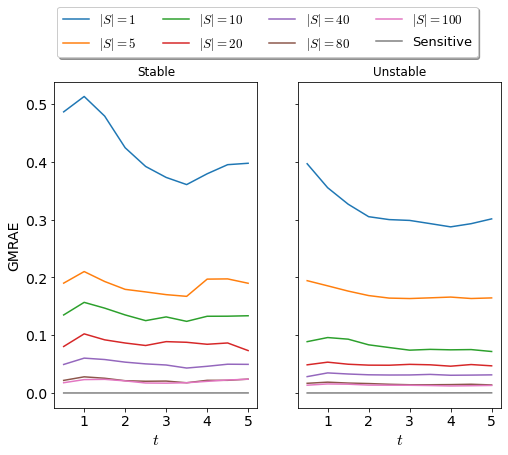

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(8, 6))
df2[True].unstack(['Method','n']).plot(ax=ax1, legend=False, logy=False, ylabel="GMRAE", fontsize=14, title='Stable')
df2[False].unstack(['Method','n']).plot(ax=ax2,
    legend=False, logy=False, fontsize=14, title='Unstable')
ax1.set_ylabel('GMRAE',fontdict={'fontsize':14})
ax1.set_xlabel("$t$", fontdict={'fontsize':16})
ax2.set_xlabel("$t$", fontdict={'fontsize':16})
plt.legend([f"$|S| = {n}$" for n in ns] + ["Sensitive"],
           loc='upper center', bbox_to_anchor=(-0.15, 1.25),
          ncol=4, fancybox=True, shadow=True, fontsize=13)
# plt.ylabel("GMRAE")
#ax = plt.gca()
#ax.set_yscale('log')
#plt.tick_params(axis='y', which='minor')
#ax.yaxis.set_major_formatter(LogFormatterSciNotation(labelOnlyBase=False))
#ax.yaxis.set_minor_formatter(LogFormatterSciNotation(labelOnlyBase=False, minor_thresholds=(3, 0.5)))

#ax.minorticks_off()

#plt.yticks(np.logspace(-0.9, 0, 3))
#ax.yaxis.set_major_formatter(FormatStrFormatter("%.2f"))
plt.savefig("figures/2d-linear-lipschitz-comparision.pdf", bbox_inches='tight')
plt.show()

### Figure 8

Comparison of total runtime against GMRAE for
stable and unstable random 2D linear systems

#### Data analysis

In [35]:
df4 = {
    k: pd.DataFrame(df1[df1['Class']==k][df1['t'] > 0][['Method', 'n', 'RAE']].groupby(['Method', 'n']).apply(lambda x: float(stats.gmean(x)[0])), columns=["GMRAE"])
    for k in [True, False]
}
df4

/tmp/ipykernel_105303/4273616306.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k: pd.DataFrame(df1[df1['Class']==k][df1['t'] > 0][['Method', 'n', 'RAE']].groupby(['Method', 'n']).apply(lambda x: float(stats.gmean(x)[0])), columns=["GMRAE"])
/tmp/ipykernel_105303/4273616306.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k: pd.DataFrame(df1[df1['Class']==k][df1['t'] > 0][['Method', 'n', 'RAE']].groupby(['Method', 'n']).apply(lambda x: float(stats.gmean(x)[0])), columns=["GMRAE"])


{True:                   GMRAE
 Method    n            
 Sampling  1    0.417092
           5    0.186446
           10   0.135073
           20   0.086119
           40   0.050606
           80   0.022121
           100  0.020213
 Sensitive 1    0.000042,
 False:                   GMRAE
 Method    n            
 Sampling  1    0.314122
           5    0.170786
           10   0.080694
           20   0.048852
           40   0.031436
           80   0.015542
           100  0.013510
 Sensitive 1    0.000084}

In [36]:
df4[True]

GMRAE
Method    n            
Sampling  1    0.417092
          5    0.186446
          10   0.135073
          20   0.086119
          40   0.050606
          80   0.022121
          100  0.020213
Sensitive 1    0.000042

In [37]:
df5 = {k: df3[k].join(df4[k]) for k in [True, False]}
df5

{True:                 Runtime     GMRAE
 Method    n                      
 Sampling  1    0.088672  0.417092
           5    0.181469  0.186446
           10   0.316463  0.135073
           20   0.615504  0.086119
           40   1.179650  0.050606
           80   2.392167  0.022121
           100  2.868750  0.020213
 Sensitive 1    0.084675  0.000042,
 False:                 Runtime     GMRAE
 Method    n                      
 Sampling  1    0.078402  0.314122
           5    0.162086  0.170786
           10   0.276295  0.080694
           20   0.550837  0.048852
           40   1.089539  0.031436
           80   2.180804  0.015542
           100  2.605685  0.013510
 Sensitive 1    0.084476  0.000084}

In [38]:
df5[True]

Runtime     GMRAE
Method    n                      
Sampling  1    0.088672  0.417092
          5    0.181469  0.186446
          10   0.316463  0.135073
          20   0.615504  0.086119
          40   1.179650  0.050606
          80   2.392167  0.022121
          100  2.868750  0.020213
Sensitive 1    0.084675  0.000042

#### Plot Figure

In [39]:
import matplotlib.pyplot as plt

In [40]:
labels = [f"$|S| = {n}$" for n in ns] + ["Sensitive"]
labels

['$|S| = 1$',
 '$|S| = 5$',
 '$|S| = 10$',
 '$|S| = 20$',
 '$|S| = 40$',
 '$|S| = 80$',
 '$|S| = 100$',
 'Sensitive']

In [41]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color'][:8]

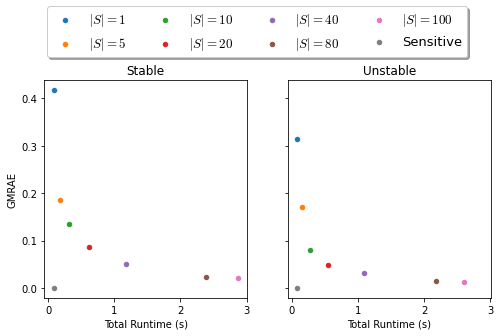

In [42]:
fig, ax = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(8, 4))

for i, (c, l) in enumerate(zip(colors, labels)):
    df5[True].iloc[[i]].plot.scatter('Runtime', 'GMRAE', ax=ax[0], c=c, title='Stable')
    df5[False].iloc[[i]].plot.scatter('Runtime', 'GMRAE', ax=ax[1], c=c, title='Unstable')

for axi in ax:
    axi.set_xlabel('Total Runtime (s)')
    
plt.legend([f"$|S| = {n}$" for n in ns] + ["Sensitive"],
          loc='upper center', bbox_to_anchor=(-0.15, 1.37),
         ncol=4, fancybox=True, shadow=True, fontsize=13)

plt.savefig("figures/2d-linear-lipschitz-runtime.pdf", bbox_inches='tight')
plt.show()

### Run $n^{\mathrm{d}}$ Linear Systems Benchmarks (skippable)

Run evaluation experiments on $n^{\mathrm{d}}$ linear systems and compute statistics. **Skip running this section in order to reuse the saved results from the paper.**

Number of samples for each run

In [43]:
n_samples = 100

Generate systems

In [44]:
lin_sys = [
    generate_linear_systems(i, n_samples)
    for i in range(1, 6+1)
]
lin_sys

/workspaces/SIM-Black-Box-Reachability/experiment_code/benchmarking.py:132: DeprecationWarning: automatic conversions from floating-point numbers to intervals are deprecated
See http://trac.sagemath.org/15114 for details.
  random_RIF_vector(m),


[{True: [System(R, (x1), [[0.98956312797036938 .. 0.99970875507430246]], (-0.24993504128842137*x1 - 0.4362768159400021), varmap=bidict({'x1': x1}))),
   System(R, (x1), [[-0.97481659340636484 .. 0.088383115459589546]], (-0.00584176230575828*x1 + 0.863492029323857), varmap=bidict({'x1': x1}))),
   System(R, (x1), [[-0.71421107076889934 .. 0.98829967246992135]], (-0.5344885695634263*x1 - 0.5506176444140509), varmap=bidict({'x1': x1}))),
   System(R, (x1), [[0.30147316460124673 .. 0.31413188663662001]], (-0.14464622598522348*x1 + 0.06825815842784855), varmap=bidict({'x1': x1}))),
   System(R, (x1), [[-0.95101479615325025 .. -0.32847528610188014]], (-0.31202315764282607*x1 + 0.11679547219068498), varmap=bidict({'x1': x1}))),
   System(R, (x1), [[0.25317232692401070 .. 0.87738318065517629]], (-0.19498270032889642*x1 - 0.6332365187630711), varmap=bidict({'x1': x1}))),
   System(R, (x1), [[0.48049214800943884 .. 0.96437721658050180]], (-0.28725571761910706*x1 - 0.21216397016713961), varmap=bi

In [45]:
all_sys = sum([w for l in lin_sys for w in list(l.values())], [])

Compute Lipschitz constants

In [46]:
lips = {
    sys: linear_system_lipschitz_vector(sys, 5.0)
        for sys in all_sys
}
lips

{System(R, (x1), [[0.98956312797036938 .. 0.99970875507430246]], (-0.24993504128842137*x1 - 0.4362768159400021), varmap=bidict({'x1': x1}))): (10141204801825839715573253013505/10141204801825835211973625643008*e^(-31825411/25466946)),
 System(R, (x1), [[-0.97481659340636484 .. 0.088383115459589546]], (-0.00584176230575828*x1 + 0.863492029323857), varmap=bidict({'x1': x1}))): (1153843746341072630199324869336185/1153843746341072678237720894621472*e^(-3718519/127308124)),
 System(R, (x1), [[-0.71421107076889934 .. 0.98829967246992135]], (-0.5344885695634263*x1 - 0.5506176444140509), varmap=bidict({'x1': x1}))): (70425033346013370027542868425/70425033346012994727573920882*e^(-9976622/3733147)),
 System(R, (x1), [[0.30147316460124673 .. 0.31413188663662001]], (-0.14464622598522348*x1 + 0.06825815842784855), varmap=bidict({'x1': x1}))): (162259276829213381405976519770113/162259276829213363391578010288128*e^(-37339018/51628057)),
 System(R, (x1), [[-0.95101479615325025 .. -0.32847528610188014]

Format as dataframe

In [47]:
df = pd.concat([
    pd.DataFrame({'Class': [k]*n_samples, 'System': L[k]})
        for L in lin_sys for k in [True, False]
], ignore_index=True)
df.insert(
    2,
    'Dim',
    [len(sys.x) for sys in df['System']],
)
df.insert(
    3,
    '# Eqs',
    df['Dim']**2 + df['Dim'],
)
df

,Class,System,Dim,# Eqs
0,True,"System(R, (x1), [[0.98956312797036938 .. 0.999...",1,2
1,True,"System(R, (x1), [[-0.97481659340636484 .. 0.08...",1,2
2,True,"System(R, (x1), [[-0.71421107076889934 .. 0.98...",1,2
3,True,"System(R, (x1), [[0.30147316460124673 .. 0.314...",1,2
4,True,"System(R, (x1), [[-0.95101479615325025 .. -0.3...",1,2
...,...,...,...,...
1195,False,"System(R, (x1, x2, x3, x4, x5, x6), [[-0.24233...",6,42
1196,False,"System(R, (x1, x2, x3, x4, x5, x6), [[-0.40508...",6,42
1197,False,"System(R, (x1, x2, x3, x4, x5, x6), [[-0.76563...",6,42
1198,False,"System(R, (x1, x2, x3, x4, x5, x6), [[-0.53842...",6,42


Compute grid sampled variational solutions

In [48]:
var_solutions = {
    sys: sys.variational_extension.solve_grid_sampled(1, (0, 5))
        for sys in all_sys
}

KeyboardInterrupt: 

Compute runtimes

In [ ]:
runtime_fs = [
    var_solutions[s].runtime
        for s in all_sys
]

Create sensitivity dataframe

In [ ]:
df_sens = pd.DataFrame({
    'System': [s for s in all_sys],
    'Method': ['Sensitive']*len(all_sys),
    'n': [1 for s in all_sys],
    'Lipschitz': sensitive_lipschitzs,
    'Runtime_F': runtime_fs,
    'Runtime_V': runtime_vs,
})
df_sens

Sample individual solutions

In [ ]:
sampled_sols = {
    sys: {n: sys.solve_sampled(n, (0, 5)) for n in ns}
    for sys in all_sys
}

In [ ]:
sampled_lipschitzs, runtime_fs = zip(*(
    timed(sampled_sols[s][n].lipschitz_scp)(5.0,
    p=sg.Infinity)
        for n in ns for s in all_sys
))

In [ ]:
runtime_vs = [
    sampled_sols[s][n].runtime
        for n in ns for s in all_sys
]

In [ ]:
df_scp = pd.DataFrame({
    'System': [s for n in ns for s in all_sys],
    'Method': ['Sampling']*len(ns)*len(all_sys),
    'n': [n for n in ns for s in all_sys],
    'Lipschitz': sampled_lipschitzs,
    'Runtime_F': runtime_fs,
    'Runtime_V': runtime_vs,
})

Merge datasets

In [ ]:
df1 = df.merge(
    pd.concat([df_sens, df_scp], ignore_index=True),
    on=['System'],
)
df1

,Class,System,Dim,# Eqs,Method,n,Lipschitz,Runtime_F,Runtime_V
0,True,"System(R, (x1), [[0.18105199742456568 .. 0.305...",1,2,Sensitive,1,[0.007912301765051399],0.250851,0.112744
1,True,"System(R, (x1), [[0.18105199742456568 .. 0.305...",1,2,Sampling,1,[0.007967461328102334],0.195487,0.064389
2,True,"System(R, (x1), [[0.18105199742456568 .. 0.305...",1,2,Sampling,50,[0.008033135458824918],0.544616,1.005797
3,True,"System(R, (x1), [[0.18105199742456568 .. 0.305...",1,2,Sampling,100,[0.008021393943111833],0.375035,2.175815
4,True,"System(R, (x1), [[0.36856400128640443 .. 0.465...",1,2,Sensitive,1,[0.5182273450063076],0.030334,0.001537
...,...,...,...,...,...,...,...,...,...
4795,False,"System(R, (x1, x2, x3, x4, x5, x6), [[-0.89751...",6,42,Sampling,100,"[1.2904836001233413, 0.6288499035403192, 1.273...",1.424922,22.387703
4796,False,"System(R, (x1, x2, x3, x4, x5, x6), [[0.093742...",6,42,Sensitive,1,"[1848.3479972034277, 2269.0843601224306, 546.8...",11.464290,0.003503
4797,False,"System(R, (x1, x2, x3, x4, x5, x6), [[0.093742...",6,42,Sampling,1,"[305.6704377318417, 462.6512100476734, 75.5589...",0.539596,0.393776
4798,False,"System(R, (x1, x2, x3, x4, x5, x6), [[0.093742...",6,42,Sampling,50,"[1195.772777383962, 1542.0752904091148, 321.18...",0.511315,12.861313


Compute runtime

In [ ]:
df1.insert(
    9,
    'Runtime',
    df1['Runtime_F'] + df1['Runtime_V'],
)

Compute RAE

In [ ]:
df1.insert(
    10,
    'RAE',
    [(row['Lipschitz'] - lips[row['System']]).norm()/lips[row['System']].norm() for i, row in df1.iterrows()],
)

Save final dataframe

In [ ]:
with open("results/linear-nd-df1.pkl", "wb") as f:
    pickle.dump(df1, f)

### Figure 9

Errors and runtimes of different methods of Lipschitz
estimation at time point $t = 5.0$ for randomly sampled linear
systems of up to $6$ dimensions.

#### Analysis

Load $n^{\mathrm{d}}$ linear systems data

In [73]:
with open("results/linear-nd-df1.pkl", "rb") as f:
    df = pickle.load(f)

df

,Class,System,Dim,# Eqs,Method,n,Lipschitz,Runtime_F,Runtime_V,Runtime,RAE
0,True,"System(R, (x1), [[0.18105199742456568 .. 0.305...",1,2,Sensitive,1,[0.007912301765051399],0.250851,0.112744,0.363595,1/2535301200456461054793220096001*abs(25353012...
1,True,"System(R, (x1), [[0.18105199742456568 .. 0.305...",1,2,Sampling,1,[0.007967461328102334],0.195487,0.064389,0.259875,1/2535301200456461054793220096001*abs(25353012...
2,True,"System(R, (x1), [[0.18105199742456568 .. 0.305...",1,2,Sampling,50,[0.008033135458824918],0.544616,1.005797,1.550413,1/2535301200456461054793220096001*abs(25353012...
3,True,"System(R, (x1), [[0.18105199742456568 .. 0.305...",1,2,Sampling,100,[0.008021393943111833],0.375035,2.175815,2.550850,1/2535301200456461054793220096001*abs(25353012...
4,True,"System(R, (x1), [[0.36856400128640443 .. 0.465...",1,2,Sensitive,1,[0.5182273450063076],0.030334,0.001537,0.031871,1/162259276829213381405976519770113*abs(162259...
...,...,...,...,...,...,...,...,...,...,...,...
4795,False,"System(R, (x1, x2, x3, x4, x5, x6), [[-0.89751...",6,42,Sampling,100,"[1.2904836001233413, 0.6288499035403192, 1.273...",1.424922,22.387703,23.812625,0.7017786307845163
4796,False,"System(R, (x1, x2, x3, x4, x5, x6), [[0.093742...",6,42,Sensitive,1,"[1848.3479972034277, 2269.0843601224306, 546.8...",11.464290,0.003503,11.467794,5.585170247352636e-05
4797,False,"System(R, (x1, x2, x3, x4, x5, x6), [[0.093742...",6,42,Sampling,1,"[305.6704377318417, 462.6512100476734, 75.5589...",0.539596,0.393776,0.933372,0.8212881356079198
4798,False,"System(R, (x1, x2, x3, x4, x5, x6), [[0.093742...",6,42,Sampling,50,"[1195.772777383962, 1542.0752904091148, 321.18...",0.511315,12.861313,13.372629,0.32894476739012846


Format dataframes and compute GMRAEs

In [ ]:
df1 = {
    k: pd.DataFrame(df[df['Class'] == k][['Dim', '# Eqs', 'Method', 'n', 'RAE']].groupby(['Dim', '# Eqs', 'Method', 'n']).apply(lambda x: float(stats.gmean(x)[0])), columns = ['GMRAE'])
    for k in [True, False]
}
df1[True]

GMRAE
Dim # Eqs Method    n            
1   2     Sampling  1    0.002906
                    50   0.005275
                    100  0.005411
          Sensitive 1    0.000305
2   6     Sampling  1    0.371458
                    50   0.042026
                    100  0.018788
          Sensitive 1    0.000073
3   12    Sampling  1    0.592070
                    50   0.213330
                    100  0.182377
          Sensitive 1    0.000056
4   20    Sampling  1    0.695590
                    50   0.337918
                    100  0.294919
          Sensitive 1    0.000033
5   30    Sampling  1    0.750190
                    50   0.413029
                    100  0.387538
          Sensitive 1    0.000034
6   42    Sampling  1    0.803770
                    50   0.474300
                    100  0.439195
          Sensitive 1    0.000033

Compute mean runtimes

In [ ]:
df2 = {
    k: df[df['Class'] == k][['Dim', '# Eqs', 'Method', 'n', 'Runtime']].groupby(['Dim', '# Eqs', 'Method', 'n']).mean()
    for k in [True, False]
}
df2[True]

Runtime
Dim # Eqs Method    n             
1   2     Sampling  1     0.071715
                    50    2.293845
                    100   1.823002
          Sensitive 1     0.041099
2   6     Sampling  1     0.129731
                    50    2.072941
                    100   3.113318
          Sensitive 1     0.118381
3   12    Sampling  1     0.277827
                    50    2.370062
                    100   5.115516
          Sensitive 1     0.526770
4   20    Sampling  1     0.302515
                    50    2.202095
                    100   5.058175
          Sensitive 1     1.557918
5   30    Sampling  1     0.413323
                    50    3.041909
                    100   6.661105
          Sensitive 1     4.306456
6   42    Sampling  1     0.660429
                    50    7.137171
                    100  15.317953
          Sensitive 1    10.238858

Merge data

In [ ]:
df3 = {k: df1[k].join(df2[k]) for k in [True, False]}
df3[True]

GMRAE    Runtime
Dim # Eqs Method    n                       
1   2     Sampling  1    0.002906   0.071715
                    50   0.005275   2.293845
                    100  0.005411   1.823002
          Sensitive 1    0.000305   0.041099
2   6     Sampling  1    0.371458   0.129731
                    50   0.042026   2.072941
                    100  0.018788   3.113318
          Sensitive 1    0.000073   0.118381
3   12    Sampling  1    0.592070   0.277827
                    50   0.213330   2.370062
                    100  0.182377   5.115516
          Sensitive 1    0.000056   0.526770
4   20    Sampling  1    0.695590   0.302515
                    50   0.337918   2.202095
                    100  0.294919   5.058175
          Sensitive 1    0.000033   1.557918
5   30    Sampling  1    0.750190   0.413323
                    50   0.413029   3.041909
                    100  0.387538   6.661105
          Sensitive 1    0.000034   4.306456
6   42    Sampling  1    0.803770   0.660429
                    50   0.474300   7.137171
                    100  0.439195  15.317953
          Sensitive 1    0.000033  10.238858

Reset nested dataframe index for plotting

In [49]:
df4 = {k: d.reset_index() for k, d in df3.items()}
df4[True]

,Method,n,Runtime
0,Sampling,1,0.088672
1,Sampling,5,0.181469
2,Sampling,10,0.316463
3,Sampling,20,0.615504
4,Sampling,40,1.179650
5,Sampling,80,2.392167
6,Sampling,100,2.868750
7,Sensitive,1,0.084675


#### Plot Figure

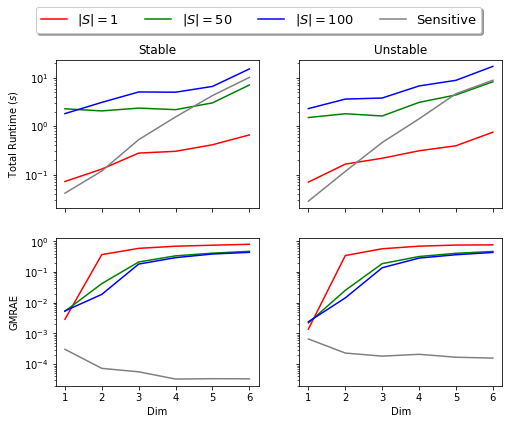

In [ ]:
fig, ax = plt.subplots(2, 2, sharex=True, sharey='row', figsize=(8, 6))

cols = ['red', 'green', 'blue', 'gray']
for (key, group), col in zip(df4[True].groupby(['Method', 'n']), cols):
    group.plot.line('Dim', 'Runtime', label=key, c=col, ax=ax[0][0], logy=True, legend=False, ylabel='Total Runtime ($s$)', title='Stable')
    group.plot.line('Dim', 'GMRAE', label=key, c=col, ax=ax[1][0], logy=True, ylabel='GMRAE', xlabel="Dim", legend=False)
for (key, group), col in zip(df4[False].groupby(['Method', 'n']), cols):
    group.plot.line('Dim', 'Runtime', label=key, c=col, ax=ax[0][1], logy=True, legend=False, ylabel='Total Runtime ($s$)', title='Unstable')
    group.plot.line('Dim', 'GMRAE', label=key, c=col, ax=ax[1][1], logy=True, ylabel='GMRAE', xlabel="Dim", legend=False)


plt.legend([f"$|S| = {n}$" for n in [1, 50, 100]] + ["Sensitive"],
           loc='upper center', bbox_to_anchor=(-0.2, 2.6),
          ncol=4, fancybox=True, shadow=True, fontsize=13)

plt.savefig("figures/nd-linear-runtime-gmraes.pdf", bbox_inches='tight')

## Validation Experiments: Nonlinear Systems

Helper functions for computing flowpipe volumes

In [52]:
def comp_volume_interval(sol, T, ts):
    # For a proper interval function, use the maximum of the Flow pipe over a timestep, rather than its value at the left endpoint
    step = sg.RIF(0, ts)
    return sum(
        math.prod(sol.state(sg.RIF(t) + step).apply_map(lambda I: I.absolute_diameter()))*ts
            for t in sg.srange(0, T, ts)
    )

In [53]:
def comp_volume(sol, T, ts):
    return sum(
        math.prod(sol.state(t).apply_map(lambda I: I.absolute_diameter()))*ts
            for t in sg.srange(0, T, ts)
    )

Dataframes for nonlinear system results

In [54]:
systems = [] 

df = pd.DataFrame(columns=['Model Name', 'Method', 'Samples','Runtime_v', 'Runtime_f', 'Volume'])
parameters = {}
solving_time = {}

### Nonlinear test systems

1. Van Der Pol (2D)

In [55]:
R1, (x, y) = sg.PolynomialRing(sg.RIF, 'x, y').objgens()

VDP = System(
    R1,
    (x,y),
    (RIF(1.1, 1.4), RIF(2.35, 2.45)),
    ((y, (1 - x**2) * y - x)),
)

#systems.append(VDP)

In [56]:
#https://github.com/chenxin415/flowstar/blob/master/benchmarks/continuous/vanderpol/vanderpol.cpp
parameters[VDP] = {"step_size":0.02, "order":5}
solving_time[VDP] = (0, 5)

2. Coupled Van Der Pol (4D, mu=1): https://github.com/chenxin415/flowstar/tree/master/benchmarks/continuous/coupled_vanderpol

In [57]:
R2, (x1, y1, x2, y2) = sg.PolynomialRing(sg.RIF, 'x1, y1, x2, y2').objgens()

In [58]:
cVDP = System(
    R2,
    (x1, y1, x2, y2),
    (RIF(1.25, 1.55), RIF(2.35, 2.45), RIF(1.25, 1.55), RIF(2.35, 2.45)),
    ((y1), (1*(1-x1**2)*y1 - 2*x1+x2), (y2), (1*(1-x2**2)*y2 - 2*x2+x1)),
)

systems.append(cVDP)

In [59]:
# from ARCH20 "and the remainder estimation of [−0.1, 0.1]"  is that  "estimation":1e-1?
parameters[cVDP] = {"step_size":0.02, "order":5, "cutoff_threshold":1e-7, "estimation":1e-1, "symbolic_remainder":400}
solving_time[cVDP] = (0, 5)

3. Rossler System (3D)

In [60]:
R3, (x,y,z) = sg.PolynomialRing(sg.RIF, 'x,y,z').objgens()

In [61]:
ROS = System(
    R3,
    (x,y,z),
    (RIF(0.7, 1), RIF(1), RIF(1)),
    (-(y + z), x + RIF("0.398")*y, RIF(2) + z * (x - RIF(4))),
)

systems.append(ROS)

In [62]:
#https://github.com/chenxin415/flowstar/blob/master/benchmarks/continuous/roessler/roessler.cpp
parameters[ROS] = {"step_size":0.02, "order":5, "cutoff_threshold":1e-8, "estimation":1e-1, "symbolic_remainder":500}
solving_time[ROS] = (0, 5)

4. Spring Pendulum System (4D)

In [63]:
R4 = sg.SR
x = sg.var("r, theta, vr, vtheta")

In [64]:
PEN = System(
    R4,
    x,
    (RIF(1.2) + RIF(-0.01, 0.01), RIF(0.5) + RIF(-0.01, 0.01), 0, 0),
    (
        vr,
        vtheta,
        r*vtheta**2 + 9.8*sg.cos(theta) - 2*(r - 1),
        - (2*vr*vtheta + 9.8*sg.sin(theta))/r,
    ),
)
systems.append(PEN)

solving_time[PEN] = (0, 3)

In [65]:
#https://github.com/chenxin415/flowstar/blob/master/benchmarks/continuous/spring_pendulum/spring_pendulum.cpp
parameters[PEN] = {"step_size":0.05, "order":5, "symbolic_remainder":200, "estimation": 1e-1}

5. Biological Model (7D): https://ths.rwth-aachen.de/research/projects/hypro/biological-model-i/

In [66]:
R5, (x1, x2, x3, x4, x5, x6, x7) = sg.PolynomialRing(sg.RIF, 'x1, x2, x3, x4, x5, x6, x7').objgens()

In [67]:
BIO = System(
    R5,
    (x1, x2, x3, x4, x5, x6, x7),
    (RIF(0.99, 1.01), RIF(0.99, 1.01), RIF(0.99, 1.01), RIF(0.99, 1.01), RIF(0.99, 1.01), RIF(0.99, 1.01), RIF(0.99, 1.01)),
    ((RIF(-0.4) * x1 + RIF(5.0) * x3 * x4), (RIF(0.4) * x1 - x2), (x2 - RIF(5.0) * x3 * x4), (RIF(5.0) * x5 * x6 - RIF(5.0) * x3 * x4), (RIF(-5.0)* x5 * x6 + RIF(5.0) * x3 * x4), 
    (RIF(0.5) * x7 - RIF(5.0)* x5 * x6), (RIF(-0.5) * x7 + RIF(5.0)*x5 * x6)),
)

systems.append(BIO)

parameters[BIO] ={}
solving_time[BIO] = (0, 0.2)

### Run nonlinear benchmarks (skippable)

In [ ]:
no_of_samples = [10, 20, 50, 75, 100, 150, 200, 400, 500, 750, 1000] 
for s in systems:

    # solve system by using Flow*, collect computation time/flowpipe volume and store it in the dataframe
    
    t0 = perf_counter()
    solution = s.solve_flowstar(solving_time[s], **parameters[s])
    t_end_var = perf_counter() - t0
    [([t.endpoints() for t in solution.state(ts)]) for ts in (np.linspace(0, solving_time[s][1], int(solving_time[s][1]*10))).tolist()]
    t_end_flowpipe = perf_counter() - t0

    # Check Flow* has actually succeeded
    assert solution.flowpipe.status <= 2

    solution_vol = comp_volume_interval(solution, solving_time[s][1], 0.1)

    print("Flow* solution volume", len(s.x), solving_time[s][1], solution_vol)

    df0 = pd.DataFrame([{'Model Name':s, 'Method':' Flow*', 'Samples':'', 'Runtime_v':t_end_var, 'Runtime_f':t_end_flowpipe, 'Volume': solution_vol}])
    df = pd.concat([df, df0])

    for sp in no_of_samples:

        t0 = perf_counter() # estimate comp. time to solve_sensitive with sp number of samples
        sol_sen = s.solve_sensitive(sp, solving_time[s])
        t_end_var = perf_counter() - t0
        [([t.endpoints() for t in sol_sen.state(ts)]) for ts in (np.linspace(0, solving_time[s][1], int(solving_time[s][1]*10))).tolist()]
        t_end_flowpipe = perf_counter() - t0

        sol_vol_sen = comp_volume(sol_sen, solving_time[s][1], 0.1)

        df0 = pd.DataFrame([{'Model Name':s, 'Method':'sensitive', 'Samples':sp, 
                                  'Runtime_v':t_end_var, 'Runtime_f':t_end_flowpipe, 'Volume': sol_vol_sen}])
        df = pd.concat([df, df0])
       
        t0 = perf_counter()
        sol_sam = s.solve_lipschitz_sampled_fixed(sp, solving_time[s])
        t_end_var = perf_counter() - t0
        [([t.endpoints() for t in sol_sam.state(ts)]) for ts in (np.linspace(0, solving_time[s][1], int(solving_time[s][1]*10))).tolist()]
        t_end_flowpipe = perf_counter() - t0

        sol_vol_sam = comp_volume(sol_sam, solving_time[s][1], 0.1)

        df0 = pd.DataFrame([{'Model Name':s, 'Method':'lipschitz', 'Samples':sp, 
                                'Runtime_v': t_end_var, 'Runtime_f':t_end_flowpipe, 'Volume': sol_vol_sam}])
        df = pd.concat([df, df0])

Export results to CSV file

In [ ]:
df.to_csv('nonlinear_results.csv')

### Nonlinear Benchmark Analysis

Load non-linear benchmark results

In [68]:
df = pd.read_csv('nonlinear_results.csv')

Plot runtime of different non-linear models

In [69]:
d0 = df[df['Method'] == 'sensitive']
d0 = d0[['Samples', 'Runtime_f', 'Runtime_v', 'Volume']]
d1 = df[df['Method'] == 'lipschitz']
d1 = d1[['Samples', 'Runtime_f', 'Runtime_v', 'Volume']]
d2 = df[df['Method'] == ' Flow*']
d2 = d2[['Runtime_f', 'Volume']]

xs = [10, 20, 50, 75, 100, 150, 200, 400, 500, 750, 1000] 

### Figure 11

Volume error exercise that demonstrates the number
of samples effects on volume accuracy. We consider the
following number of samples [10, 20, 50, 75, 100, 150, 200, 400,
500, 750, 1000].

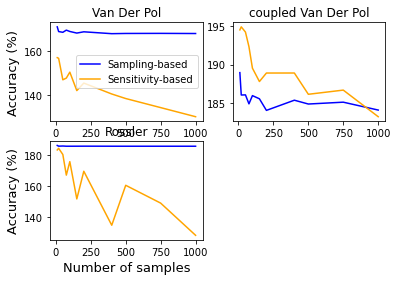

In [70]:
xs = [10, 20, 50, 75, 100, 150, 200, 400, 500, 750, 1000] # ,'cVDP','ROS','PEN'
p = 0
plot = 1

for i in ['VDP', 'cVDO', 'ROS']:
    

    plt.subplot(2, 2, plot)  
    vol_flow = d2['Volume'].tolist()[plot-1] 

    ys0 = [(100 - (((k-vol_flow)/vol_flow)*100)) for k in d0['Volume'].tolist()[p:p+11]]
    ys1 = [(100 - (((k-vol_flow)/vol_flow)*100)) for k in d1['Volume'].tolist()[p:p+11]]

    
    #ys2 = ([item for item in d2['Volume'].tolist() for i in range(11)])[p:p+11]

    plt.plot(xs,ys0, label='Sampling-based', color='blue')
    plt.plot(xs,ys1, label='Sensitivity-based', color='orange')
    #plt.plot(xs,ys2, label='Flow*', color='green')
    #plt.ylabel("Volume (%)")
    if (plot == 1):
        plt.legend()

    if (plot == 3):
        plt.xlabel("Number of samples", fontsize=13)  
        #plt.legend(['VDP', 'cVDO', 'ROS', 'PEN'],  ncol=len(['VDP', 'cVDO', 'ROS', 'PEN']))
    if  (plot == 1 or plot == 3):  
        plt.ylabel("Accuracy (%)", fontsize=13)
    
    plt.title(['Van Der Pol', 'coupled Van Der Pol', 'Rossler'][plot-1], fontsize=12)
    p = p + 11
    plot = plot + 1
    


plt.rcParams['figure.constrained_layout.use'] = True
plt.show()    

### Figure 12

Runtime validation exercise that demonstrates the
number of samples effects to computation time of reachable
sets for different non-linear models.

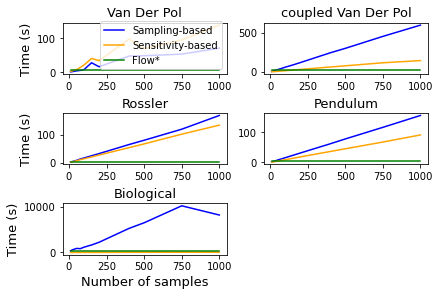

In [71]:
p = 0
plot = 1

for i in ['VDP', 'cVDO', 'ROS', 'PEN', 'BIO']:
    

    plt.subplot(3, 2, plot)  
    ys0 = d0['Runtime_f'].tolist()[p:p+11]
    ys1 = d1['Runtime_f'].tolist()[p:p+11]
    ys2 = ([item for item in d2['Runtime_f'].tolist() for i in range(11)])[p:p+11]

    plt.plot(xs,ys0, label='Sampling-based', color='blue')
    plt.plot(xs,ys1, label='Sensitivity-based', color='orange')
    plt.plot(xs,ys2, label='Flow*', color='green')
    if (plot == 1):
        plt.legend()
    if (plot == 1 or plot == 3 or plot == 5):
        plt.ylabel("Time (s)", fontsize=13)
        

    if (plot == 5):
        plt.xlabel("Number of samples", fontsize=13)  
        #plt.legend(['VDP', 'cVDO', 'ROS', 'PEN'],  ncol=len(['VDP', 'cVDO', 'ROS', 'PEN']))
    
    
    plt.title(['Van Der Pol', 'coupled Van Der Pol', 'Rossler', 'Pendulum', 'Biological'][plot-1], fontsize=13)
        
    p = p + 11
    plot = plot + 1
    
#fig.legend([line0, line1, line2], ['Sampling-based', 'Sensitivity-based', 'Flow*'], loc= 'center', bbox_to_anchor=[0.5, 1.1], ncol=3)
plt.rcParams['figure.constrained_layout.use'] = True
plt.show()    


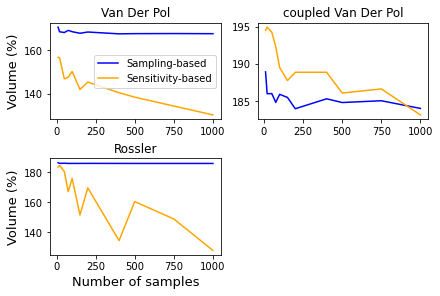

In [72]:
xs = [10, 20, 50, 75, 100, 150, 200, 400, 500, 750, 1000] # ,'cVDP','ROS','PEN'
p = 0
plot = 1

for i in ['VDP', 'cVDO', 'ROS']:
    

    plt.subplot(2, 2, plot)  
    vol_flow = d2['Volume'].tolist()[plot-1] 

    ys0 = [(100 - (((k-vol_flow)/vol_flow)*100)) for k in d0['Volume'].tolist()[p:p+11]]
    ys1 = [(100 - (((k-vol_flow)/vol_flow)*100)) for k in d1['Volume'].tolist()[p:p+11]]

    
    #ys2 = ([item for item in d2['Volume'].tolist() for i in range(11)])[p:p+11]

    plt.plot(xs,ys0, label='Sampling-based', color='blue')
    plt.plot(xs,ys1, label='Sensitivity-based', color='orange')
    #plt.plot(xs,ys2, label='Flow*', color='green')
    #plt.ylabel("Volume (%)")
    if (plot == 1):
        plt.legend()

    if (plot == 3):
        plt.xlabel("Number of samples", fontsize=13)  
        #plt.legend(['VDP', 'cVDO', 'ROS', 'PEN'],  ncol=len(['VDP', 'cVDO', 'ROS', 'PEN']))
    if  (plot == 1 or plot == 3):  
        plt.ylabel("Volume (%)", fontsize=13)
    
    plt.title(['Van Der Pol', 'coupled Van Der Pol', 'Rossler'][plot-1], fontsize=12)
    p = p + 11
    plot = plot + 1
    


#plt.rcParams['figure.constrained_layout.use'] = True
plt.show()    

### Additional analysis of runtime proportion

In [73]:
d0['Runtime_f'].tolist()

[1.4966634760057786,
 1.8258920310036049,
 4.235520494999946,
 5.548661164008081,
 8.065889446996152,
 27.95736957900226,
 16.296138972000335,
 47.7600404570112,
 48.57661584200105,
 53.30549946699466,
 70.68485429498833,
 6.771532010985538,
 12.137172646995168,
 29.626609647006266,
 44.31237830300233,
 60.45941567700356,
 88.64359322498785,
 118.96786130400142,
 244.5000651049777,
 301.3242731789942,
 454.2152170460031,
 598.0576855410181,
 1.8468654419993984,
 3.506464660022175,
 7.976760513003683,
 12.925083242007531,
 16.80136541899992,
 24.597796433983603,
 32.53374407198862,
 65.46737944500637,
 80.96061802798067,
 120.91472921299282,
 170.7118733539828,
 1.7681597569899168,
 3.196382750989869,
 8.06454945000587,
 11.880662381008731,
 15.743330409983171,
 23.441050346998964,
 31.245675020996718,
 61.87613701997907,
 77.84537318500225,
 116.24144459998934,
 155.53208874497795,
 353.8134802310087,
 538.4940693709941,
 885.5604000710009,
 832.1043360710028,
 1155.7450864020211,
 163

In [74]:
d0.insert(4, 'Runtime_proportion', [(( d0['Runtime_v'].tolist()[i] * 100 )/d0['Runtime_f'].tolist()[i]) for i in range(len(d0['Runtime_f'].tolist()))])

In [75]:
d0

,Samples,Runtime_f,Runtime_v,Volume,Runtime_proportion
1,10.0,1.496663,1.157846,1.266176e-01,77.361780
3,20.0,1.825892,1.421536,1.357980e-01,77.854314
5,50.0,4.235520,3.527489,1.372576e-01,83.283491
7,75.0,5.548661,4.430887,1.330151e-01,79.855070
9,100.0,8.065889,6.189217,1.356364e-01,76.733221
11,150.0,27.957370,22.345176,1.387585e-01,79.925888
13,200.0,16.296139,13.457467,1.362814e-01,82.580711
15,400.0,47.760040,33.605522,1.399253e-01,70.363262
17,500.0,48.576616,39.265599,1.395038e-01,80.832306
19,750.0,53.305499,44.552225,1.393392e-01,83.579041


In [76]:
d1.insert(4, 'Runtime_proportion', [(( d1['Runtime_v'].tolist()[i] * 100 )/d1['Runtime_f'].tolist()[i]) for i in range(len(d1['Runtime_f'].tolist()))])

In [77]:
d1

,Samples,Runtime_f,Runtime_v,Volume,Runtime_proportion
2,10.0,3.218009,0.244571,1.867078e-01,7.600064
4,20.0,3.841144,0.384685,1.880132e-01,10.014841
6,50.0,8.061563,0.870451,2.299196e-01,10.797546
8,75.0,14.146087,1.839727,2.265534e-01,13.005199
10,100.0,21.475914,1.761531,2.150047e-01,8.202358
12,150.0,40.654173,3.900698,2.509984e-01,9.594827
14,200.0,34.055736,3.698214,2.363115e-01,10.859297
16,400.0,97.576575,14.379009,2.575984e-01,14.736128
18,500.0,69.241221,8.293203,2.664642e-01,11.977263
20,750.0,94.813641,10.481053,2.841700e-01,11.054372


#### Figure 13

The proportion of runtime in Fig.12 to perform
sampling and solving SCP in Algorithm (2), and sample and
solve sensitivity equations in Algorithm (4). Note: the rest of the
runtime is used for computing flowpipe.

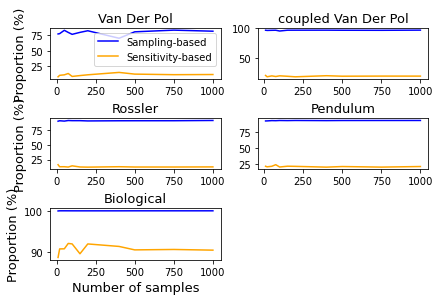

In [78]:
p = 0
plot = 1

for i in ['VDP', 'cVDO', 'ROS', 'PEN', 'BIO']:
    

    plt.subplot(3, 2, plot)  
    ys0 = d0['Runtime_proportion'].tolist()[p:p+11]
    ys1 = d1['Runtime_proportion'].tolist()[p:p+11]
    #ys2 = ([item for item in d2['Runtime_f'].tolist() for i in range(11)])[p:p+11]

    plt.plot(xs,ys0, label='Sampling-based', color='blue')
    plt.plot(xs,ys1, label='Sensitivity-based', color='orange')
    #plt.plot(xs,ys2, label='Flow*', color='green')
    if (plot == 1):
        plt.legend()
    if (plot == 1 or plot == 3 or plot == 5):
        plt.ylabel("Proportion (%)", fontsize=13)
        

    if (plot == 5):
        plt.xlabel("Number of samples", fontsize=13)  
        #plt.legend(['VDP', 'cVDO', 'ROS', 'PEN'],  ncol=len(['VDP', 'cVDO', 'ROS', 'PEN']))
    
    
    plt.title(['Van Der Pol', 'coupled Van Der Pol', 'Rossler', 'Pendulum', 'Biological'][plot-1], fontsize=13)
        
    p = p + 11
    plot = plot + 1
    
#fig.legend([line0, line1, line2], ['Sampling-based', 'Sensitivity-based', 'Flow*'], loc= 'center', bbox_to_anchor=[0.5, 1.1], ncol=3)
plt.rcParams['figure.constrained_layout.use'] = True
plt.show()    


## FMI Reachability

In [96]:
from src.SensitivityRunner import SensitivityJacobiRunner
from src.SensitivityScenario import SensitivityScenario
from src.fmus import MSD1, MSD2
from PyCosimLibrary.scenario import Connection, VarType, SignalType, OutputConnection
from src.fmus import *
from scipy.integrate import solve_ivp

In [97]:
def msd_system(t, state):
    x1, v1, x2, v2, dx1x1, dx1v1, dx1x2, dx1v2, dv1x1, dv1v1, dv1x2, dv1v2, dx2x1, dx2v1, dx2x2, dx2v2, dv2x1, dv2v1, dv2x2, dv2v2 = state

    dx1 = v1
    dv1 = -x1 - v1 + x1 - x2 + v2 - v1
    dx2 = v2
    dv2 = -x2 + x1 - x2 + v1 - v2
    ddx1x1 = dv1x1
    ddx1v1 = dv1v1
    ddx1x2 = dv1x2
    ddx1v2 = dv1v2
    ddv1x1 = -2*dx1x1 -2*dv1x1 + dx2x1 + dv2x1
    ddv1v1 = -2*dx1v1 -2*dv1v1 + dx2v1 + dv2v1
    ddv1x2 = -2*dx1x2 -2*dv1x2 + dx2x2 + dv2x2
    ddv1v2 = -2*dx1v2 -2*dv1v2 + dx2v2 + dv2v2
    ddx2x1 = dv2x1
    ddx2v1 = dv2v1
    ddx2x2 = dv2x2
    ddx2v2 = dv2v2
    ddv2x1 = dx1x1 + dv1x1 - 2*dx2x1 - dv2x1
    ddv2v1 = dx1v1 + dv1v1 - 2*dx2v1 - dv2v1
    ddv2x2 = dx1x2 + dv1x2 - 2*dx2x2 - dv2x2
    ddv2v2 = dx1v2 + dv1v2 - 2*dx2v2 - dv2v2

    return [dx1, dv1, dx2, dv2,
            ddx1x1, ddx1v1, ddx1x2, ddx1v2,
            ddv1x1, ddv1v1, ddv1x2, ddv1v2,
            ddx2x1, ddx2v1, ddx2x2, ddx2v2,
            ddv2x1, ddv2v1, ddv2x2, ddv2v2]

In [98]:
def msd_variational_numerical(scale):
    y0 = [1, 0, 1, 0,
          1, 0, 0, 0,
          0, 1, 0, 0,
          0, 0, 1, 0,
          0, 0, 0, 1]
    return solve_ivp(msd_system,t_span=[0,7],t_eval=scale, y0=y0, method='LSODA')

In [102]:
def build_double_msd_sensitivity_scenario(step_time):
    msd1 = MSD1("msd1")
    msd1.instantiate()
    msd2 = MSD2("msd2")
    msd2.instantiate()
    msd1_out = Connection(value_type=VarType.REAL,
                        signal_type=SignalType.CONTINUOUS,
                        source_fmu=msd1,
                        target_fmu=msd2,
                        source_vr=[msd1.x, msd1.v],
                        target_vr=[msd2.xe, msd2.ve])
    msd1_in = Connection(value_type=VarType.REAL,
                        signal_type=SignalType.CONTINUOUS,
                        source_fmu=msd2,
                        target_fmu=msd1,
                        source_vr=[msd2.fe],
                        target_vr=[msd1.fe])
    msd2_out = OutputConnection(value_type=VarType.REAL,
                                signal_type=SignalType.CONTINUOUS,
                                source_fmu=msd2,
                                source_vr=[msd2.x, msd2.v])

    connections = [msd1_out, msd1_in]
    out_connections = [msd1_out, msd1_in, msd2_out]
    scenario = SensitivityScenario(
        fmus=[msd1, msd2],
        connections=connections,
        step_size=step_time,
        print_interval=0.1,
        stop_time=7.0,
        record_inputs=True,
        outputs=out_connections)
    
    return scenario

### Figure 15

Errors between the sensitivity matrix computed by Algorithm (5) and ``solve_ivp`` method with varying time steps sizes.

In [103]:
def get_error_by_step_size(step_size):
    scenario = build_double_msd_sensitivity_scenario(step_time=step_size)
    runner = SensitivityJacobiRunner()
    runner.run_cosim(scenario, lambda t: None)
    scale = []
    t = 0
    for m in scenario.variational_matrix:
        scale.append(t)
        t = t + step_size
    
    msd_num = msd_variational_numerical(scale)
    error = []

    for i in range(len(scenario.variational_matrix)):
        sub = np.subtract(scenario.variational_matrix[i],msd_num.y[:,i][4:].reshape((4,4)))
        error.append(np.linalg.norm(sub,2))

    return [error,scale]

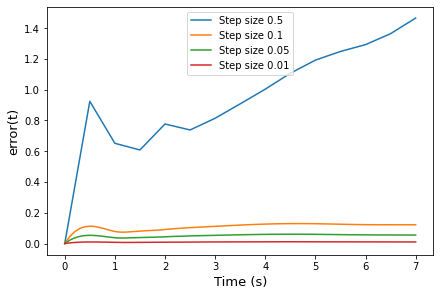

<Figure size 432x288 with 0 Axes>

In [105]:
error_scale2 = get_error_by_step_size(0.5)
error_scale3 = get_error_by_step_size(0.1)
error_scale4 = get_error_by_step_size(0.05)
error_scale5 = get_error_by_step_size(0.01)

with open("results/error05.txt", "w") as f:
    for n in error_scale2[0]:
        f.write(f"{n}\n")

with open("results/error01.txt", "w") as f:
    for n in error_scale3[0]:
        f.write(f"{n}\n")

with open("results/error005.txt", "w") as f:
    for n in error_scale4[0]:
        f.write(f"{n}\n")

with open("results/error001.txt", "w") as f:
    for n in error_scale5[0]:
        f.write(f"{n}\n")

#plt.plot(error_scale1[1],error_scale1[0])
plt.plot(error_scale2[1],error_scale2[0], label='Step size 0.5')
plt.plot(error_scale3[1],error_scale3[0], label='Step size 0.1')
plt.plot(error_scale4[1],error_scale4[0], label='Step size 0.05')
plt.plot(error_scale5[1],error_scale5[0], label='Step size 0.01')

leg = plt.legend(loc='upper center')
plt.xlabel('Time (s)', fontsize=13)
plt.ylabel('error(t)', fontsize=13)

plt.show()

plt.savefig('figures/error_comparison.pdf')

### Figure 15

701
6.999999999999895


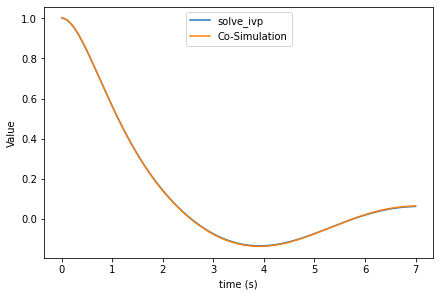

<Figure size 432x288 with 0 Axes>

In [107]:
scenario = build_double_msd_sensitivity_scenario(step_time=0.01)

runner = SensitivityJacobiRunner()
runner.run_cosim(scenario, lambda t: None)
#plt.plot(scenario.variational_matrix[0:][0][0])
list1 = []
list2 = []
list3 = []
list4 = []
scale = []
t = 0
for m in scenario.variational_matrix:
    scale.append(t)
    list1.append(m[0][0])
    list2.append(m[0][1])
    list3.append(m[0][2])
    list4.append(m[0][3])
    t = t + 0.01
#plt.show()
with open("results/dx1x1fmu.txt", "w") as f1:
    for n in list1:
        f1.write(f"{n}\n")
print(len(scale))
print(scale[-1])
msd_num = msd_variational_numerical(scale)
with open("results/dx1x1solve_ivp.txt", "w") as f2:
    for n in msd_num.y[4]:
        f2.write(f"{n}\n")
plt.figure(1)
plt.plot(scale,msd_num.y[4], label='solve_ivp')
plt.plot(scale, list1, label='Co-Simulation')
leg = plt.legend(loc='upper center')
plt.xlabel('time (s)')
plt.ylabel('Value')

plt.show()
plt.savefig('figures/sensitivity_comparison.pdf')